In [210]:
import os
import pandas as pd
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\regis\\OneDrive\\Dokumente\\GitHub\\wake_effect\\delta_wind_velocity'

In [2]:
# load data - two data frames
wind_dir = pd.read_csv('C:/Users/regis/OneDrive/Dokumente/GitHub/wake_effect/data/Wind_direction.csv')
wind_v = pd.read_csv('C:/Users/regis/OneDrive/Dokumente/GitHub/wake_effect/data/Windfarm.csv')

In [3]:
# merge two dataframes
df = wind_dir.merge(wind_v, left_on='Unnamed: 0', right_on='Unnamed: 0')

In [4]:
# Drop columns with inconsistent wind_dir records
# Get mean wind direction per angle, between average of 80.0 and 100.0. Group wind_dir by steps of 10.
# Rename numerical titles
df1 = df.drop(columns = ['10.0'])
df1 = df1.drop(columns = ['40.0'])
df1 = df1.drop(columns = ['60.0'])
df1['wind_dir'] = ((df1['80.0'] + df1['100.0'])/2).round(0)
df1['80.0'] = df1['80.0'].round(0)
df1['100.0'] = df1['100.0'].round(0)
df1 = df1.rename(columns={'80.0': 'eighty', '100.0': 'hundred'})

In [6]:
df2 = df1.groupby(['wind_dir']).mean().round(2)
df2 = df2.drop(columns = ['eighty'])
df2 = df2.drop(columns = ['hundred'])
df2.head(3)

,WTG1,WTG2,WTG3,WTG4,WTG5,WTG6,WTG7,WTG8,WTG9,WTG10,...,WTG23,WTG24,WTG25,WTG26,WTG27,WTG28,WTG29,WTG30,WTG31,WTG32
wind_dir,,,,,,,,,,,,,,,,,,,,,
2.0,4.90,5.0,5.20,4.6,4.8,4.3,4.90,4.20,5.10,4.9,...,5.0,3.7,4.90,3.7,4.90,3.60,4.8,5.5,5.2,5.00
4.0,3.25,3.1,3.15,2.7,3.1,2.8,3.45,2.45,3.45,3.2,...,3.7,3.3,3.95,3.1,3.95,3.35,3.9,4.3,4.1,3.75
5.0,1.40,1.7,1.00,1.1,1.8,1.1,1.00,1.40,1.20,1.3,...,0.5,0.8,1.20,0.9,1.40,0.70,0.5,0.8,1.3,0.80


In [7]:
# create matrix frame for delta wind speed
# each turbine has per angle a list of its wind difference to all turbines

col = ['wind_dir','WTG1','WTG2','WTG3','WTG4','WTG5','WTG6','WTG7','WTG8','WTG9','WTG10','WTG11','WTG12','WTG13','WTG14','WTG15','WTG16','WTG17','WTG18','WTG19','WTG20','WTG21','WTG22','WTG23','WTG24','WTG25','WTG26','WTG27','WTG28','WTG29','WTG30','WTG31','WTG32']
matrix = pd.DataFrame(columns=col)
matrix['wind_dir'] = range(0,361)
matrix = matrix.set_index('wind_dir')

matrix.head(3)

,WTG1,WTG2,WTG3,WTG4,WTG5,WTG6,WTG7,WTG8,WTG9,WTG10,...,WTG23,WTG24,WTG25,WTG26,WTG27,WTG28,WTG29,WTG30,WTG31,WTG32
wind_dir,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#sandbox
df2['WTG1'].iloc[[2]]

l = ["df"]
l = l + ["s"]
print(l)

['df', 's']


In [ ]:
#sandbox

#df.at[1, 'B'] = ['m', 'n']
#df.iloc[[2]]
df2.loc[[2]] # for excact value in index
#print(df2[df2['WTG1']].index.values)
(df2['WTG1'].iloc[[1]]).index.values

In [61]:
# big loop to fill matrix with array of calculated wind spped differences

ma = matrix
count = 0

for i in df2:
    index = int(df2.iloc[[count]].index.values)
    for u in ma:
        y = []
        a = (df2[u].iloc[[count]]) #aimed turbine
        for n in ma:
            b = (df2[n].iloc[[count]]) #other turbines
            c = [(a - b).round(2)]
            y = y + c
        ma.at[index, u] = y
    count = count + 1
    
        

In [153]:
ma.head(3)

,WTG1,WTG2,WTG3,WTG4,WTG5,WTG6,WTG7,WTG8,WTG9,WTG10,...,WTG23,WTG24,WTG25,WTG26,WTG27,WTG28,WTG29,WTG30,WTG31,WTG32
wind_dir,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[[0.0], [-0.1], [-0.3], [0.3], [0.1], [0.6], [...","[[0.1], [0.0], [-0.2], [0.4], [0.2], [0.7], [0...","[[0.3], [0.2], [0.0], [0.6], [0.4], [0.9], [0....","[[-0.3], [-0.4], [-0.6], [0.0], [-0.2], [0.3],...","[[-0.1], [-0.2], [-0.4], [0.2], [0.0], [0.5], ...","[[-0.6], [-0.7], [-0.9], [-0.3], [-0.5], [0.0]...","[[0.0], [-0.1], [-0.3], [0.3], [0.1], [0.6], [...","[[-0.7], [-0.8], [-1.0], [-0.4], [-0.6], [-0.1...","[[0.2], [0.1], [-0.1], [0.5], [0.3], [0.8], [0...","[[0.0], [-0.1], [-0.3], [0.3], [0.1], [0.6], [...",...,"[[0.1], [0.0], [-0.2], [0.4], [0.2], [0.7], [0...","[[-1.2], [-1.3], [-1.5], [-0.9], [-1.1], [-0.6...","[[0.0], [-0.1], [-0.3], [0.3], [0.1], [0.6], [...","[[-1.2], [-1.3], [-1.5], [-0.9], [-1.1], [-0.6...","[[0.0], [-0.1], [-0.3], [0.3], [0.1], [0.6], [...","[[-1.3], [-1.4], [-1.6], [-1.0], [-1.2], [-0.7...","[[-0.1], [-0.2], [-0.4], [0.2], [0.0], [0.5], ...","[[0.6], [0.5], [0.3], [0.9], [0.7], [1.2], [0....","[[0.3], [0.2], [0.0], [0.6], [0.4], [0.9], [0....","[[0.1], [0.0], [-0.2], [0.4], [0.2], [0.7], [0..."


In [231]:
# Function: get wind speed difference: output 
# Input: Nr. of turbine, Nr. of turbine, angle
# Output: [wind diff]

def wind_dif(turbine1, turbine2, angle):
    t1 = "WTG" + str(turbine1)
    t2 = "WTG" + str(turbine2)
    try:
        wind_dif = (df2[t1].loc[[angle]]) - (df2[t2].loc[[angle]])
        wind_dif = wind_dif.iloc[0].round(1)
        return wind_dif
    except:
        print("NaN")

In [236]:
# Function create plot of wind speed diff over all angle
# Input: Nr. of turbine, Nr. of turbine
# Output: plot

def wd_plot(turbine1, turbine2):
    t1 = "WTG" + str(turbine1)
    t2 = "WTG" + str(turbine2)
    c = []
    count = 0
    for i in df2.iterrows():
        index = int(df2.iloc[[count]].index.values)
        number = wind_dif(turbine1, turbine2, index)
        c = c + [[index] + [number]]
        count = count + 1    
    c = pd.DataFrame(c, columns=['wind_dir', 'wind_diff'])
    wind_dir = c['wind_dir']
    amount = c['wind_diff']
    fig = plt.figure()
    plt.bar(wind_dir, amount)
    fig.set_size_inches(10, 4)
    plt.show()

In [243]:
wind_dif(2, 3, 69)

1.4

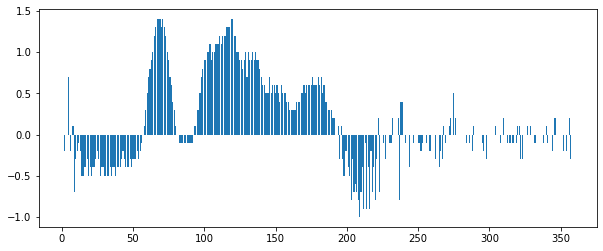

In [238]:
wd_plot(2, 3)